In [1]:
## Import the libraries

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

In [3]:
## Reading data and Plotting 

In [4]:
dataset = load_iris()
X= dataset.data
y= dataset.target
target_names=dataset.target_names
features =dataset.feature_names
print(X.shape)
# there are 150 samples with 4 dimensionalities
colors = ['navy','orange','green']

(150, 4)


In [5]:
list(dataset.target_names)

['setosa', 'versicolor', 'virginica']

In [6]:
list(dataset.feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

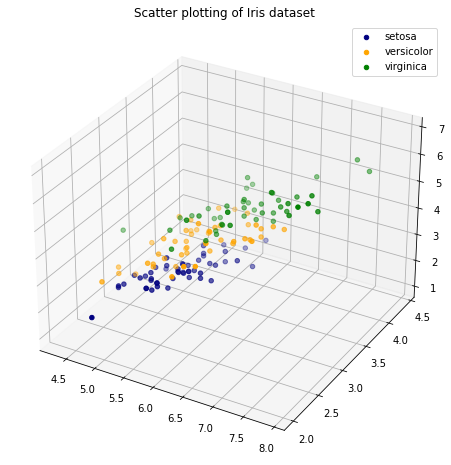

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
plt.title("Scatter plotting of Iris dataset")
for color, i, target_name in zip(colors,[0,1,2], target_names):
    ax.scatter(X[y == i,0],X[y == i,1],X[y == i,2],color = color, label = target_name)
plt.legend(loc='best')
plt.show()

In [ ]:
# How feature variables are impacting target variable

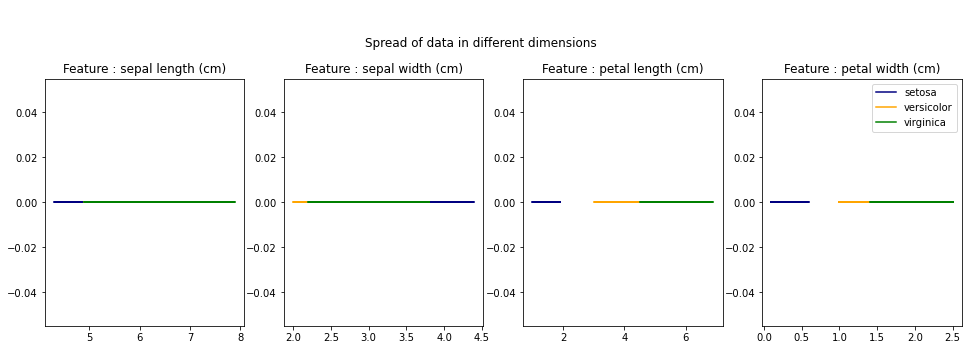

In [9]:
#Create figure
fig = plt.figure(figsize=(25,10))
fig.suptitle("\n\nSpread of data in different dimensions")
#plot
for j in range(4):
    ax = fig.add_subplot(2,6,2+j +(j>3))
    for color, i ,target_name in zip(colors, [0,1,2],target_names):
        ax.set_title("Feature : %s" %(features[j]))
        ax.plot(X[y == i,j],np.zeros_like(X[y == i,j]),color=color, label = target_name)
plt.legend(loc='best')
plt.show()

In [10]:
# split the train test dataset, test size is 20 percent of total dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [11]:
#using decision tree classifier to evaluate the methods
tree = DecisionTreeClassifier( criterion='entropy')

In [12]:
# fitting data and checking accuracy without LDA 
tree.fit(X_train,y_train)
acc = tree.score(X_test,y_test)
print("Without LDA",acc)

Without LDA 0.9666666666666667


In [14]:
# reducing dimensions
lda2 = LinearDiscriminantAnalysis(n_components=2) # model for reduction from 4D to 2D
lda1 = LinearDiscriminantAnalysis(n_components=1) # model for reduction from 4D to 1D

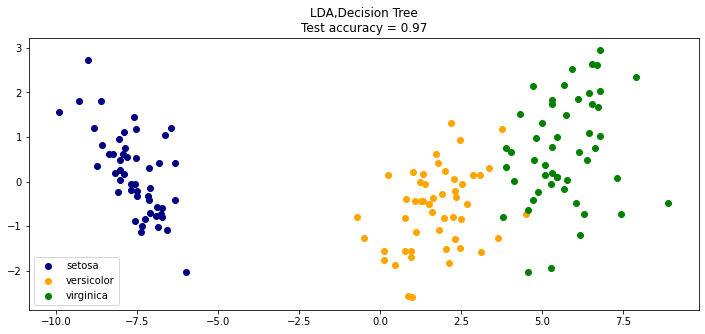

(50,)


In [18]:
# Checking accuracy after reducing to 2D
#fitting the model to lda2
lda2.fit(X_train,y_train)

#fit the Decision tree classifier on the embedded training set
tree.fit(lda2.transform(X_train),y_train)

#computing the Decision tree acccuracy on the embedded testig set
acc = tree.score(lda2.transform(X_test),y_test)
X_2=lda2.transform(X)
plt.figure(figsize=(12,5))
for color,i,target_name in zip(colors,[0,1,2], target_names):
    plt.scatter(X_2[y ==i,0], X_2[y ==i,1],color = color, label = target_name)
plt.legend(loc='best')
plt.title("LDA,Decision Tree\nTest accuracy = {:.2f}".format(acc))
plt.show()
print(X_2[y ==1,0].shape)

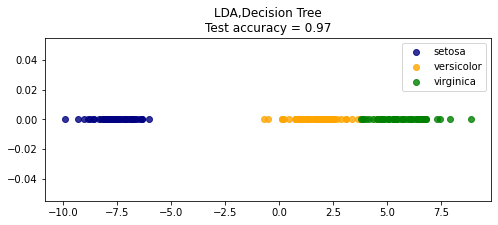

(50,)


In [22]:
# Checking accuracy after reducing to 1D
#fitting the model to lda2
lda1.fit(X_train,y_train)

#fit the Decision tree classifier on the embedded training set
tree.fit(lda1.transform(X_train),y_train)

#computing the Decision tree acccuracy on the embedded testig set
acc = tree.score(lda1.transform(X_test),y_test)
X_1=lda1.transform(X)
plt.figure(figsize=(8,3))
for color,i,target_name in zip(colors,[0,1,2], target_names):
    plt.scatter(X_1[y ==i,0], np.zeros_like(X[y ==i,j]),alpha= .8, color = color, label = target_name)
                
plt.legend(loc='best')
plt.title("LDA,Decision Tree\nTest accuracy = {:.2f}".format(acc))
plt.show()
print(X_2[y ==1,0].shape)